In [1]:
import torch.nn as nn
from case_studies.sdf import train_sdf, get_sdf_data_loader, plot_sdf_results
from src import (deep_mind_loss, EncodeProcessDecode, EncodeProcessDecodeNEW, GraphNetworkIndependentBlock, GraphNetworkBlock)

In [2]:
# data parameters

n_objects = 300
data_folder = "../sdf-prediction-graph/data2/nonuniform/mesh_from_numpy/"

batch_size = 5
edge_method = 'proximity' # or 'edge'
edge_params = {'radius': 0.25}

In [3]:
# network parameters

n_edge_feat_in, n_edge_feat_out = 3, 1
n_node_feat_in, n_node_feat_out = 3, 1
n_global_feat_in, n_global_feat_out = 3, 3
mlp_latent_size = 64
num_processing_steps = 5
model = EncodeProcessDecodeNEW(n_edge_feat_in=n_edge_feat_in, n_edge_feat_out=n_edge_feat_out,
                               n_node_feat_in=n_node_feat_in, n_node_feat_out=n_node_feat_out,
                               n_global_feat_in=n_global_feat_in, n_global_feat_out=n_global_feat_out,
                               mlp_latent_size=mlp_latent_size, num_processing_steps=num_processing_steps,
                               encoder=GraphNetworkIndependentBlock, decoder=GraphNetworkIndependentBlock,
                               processor=GraphNetworkBlock, output_transformer=GraphNetworkIndependentBlock,
                               full_output=True)

In [4]:
# train parameters

gamma       = 0.25
lr_0        = 0.001
n_epoch     = 1000
step_size   = 350
print_every = 25
save_name   = "deep_mind_nmpy_data"

In [ ]:
# loss function
loss_funcs = [deep_mind_loss]

# load data
train_data, test_data = get_sdf_data_loader(n_objects, data_folder, batch_size, eval_frac=0.1,
                                            edge_method=edge_method, edge_params=edge_params)

# train
train_sdf(model, train_data, test_data, loss_funcs, n_epoch=n_epoch, print_every=print_every,
          save_name=save_name, lr_0=lr_0, step_size=step_size, gamma=gamma)

 20%|██        | 2/10 [00:00<00:00, 14.12it/s]

preparing sdf data loader


100%|██████████| 10/10 [00:00<00:00, 14.27it/s]
0it [00:00, ?it/s]


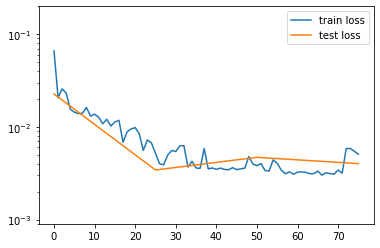

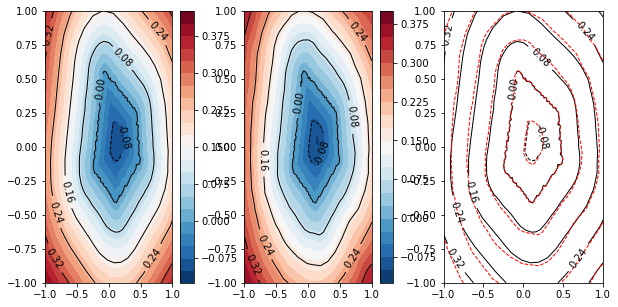

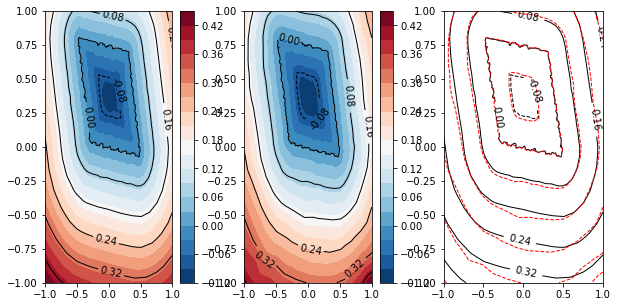

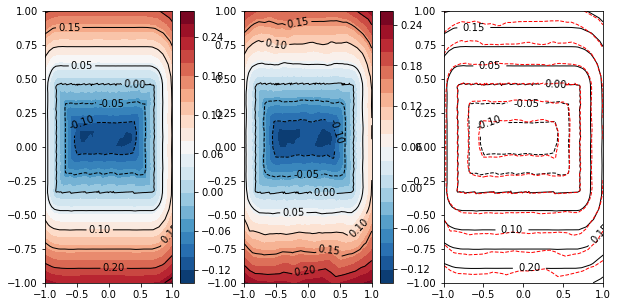

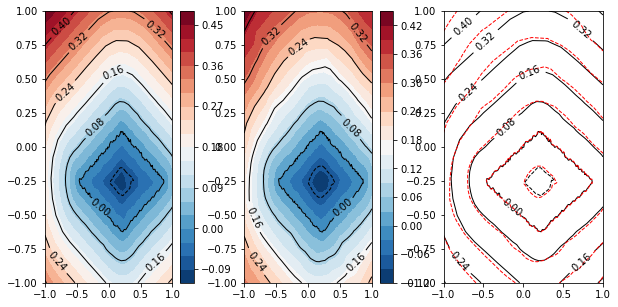

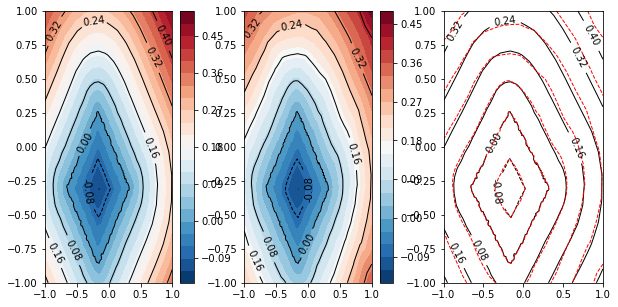

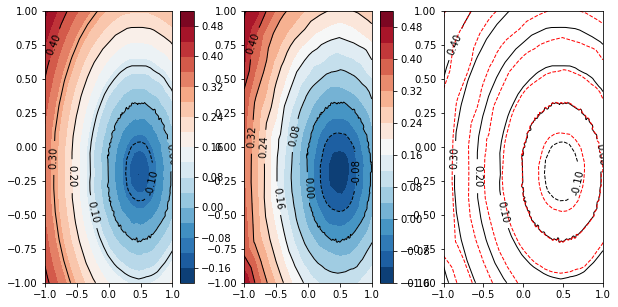

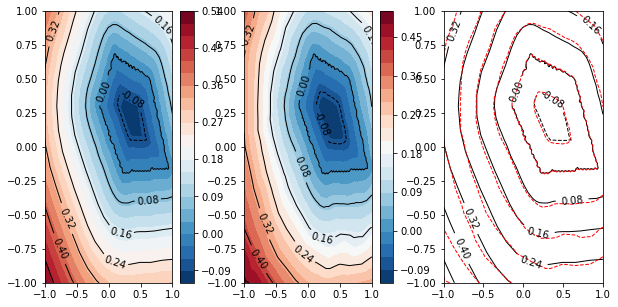

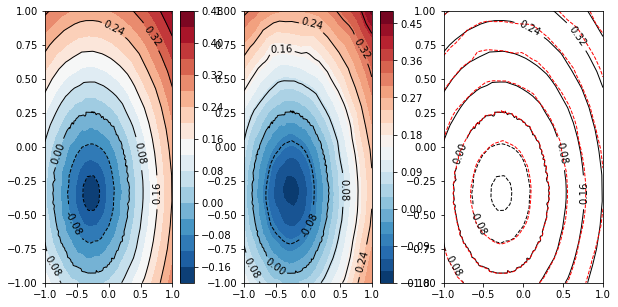

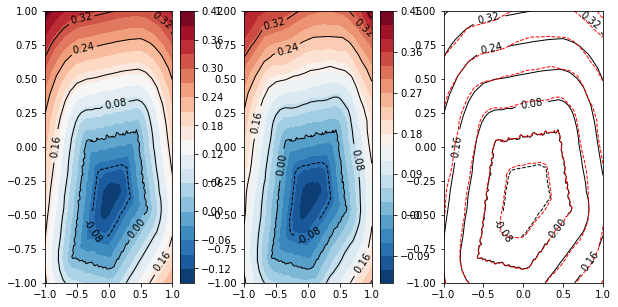

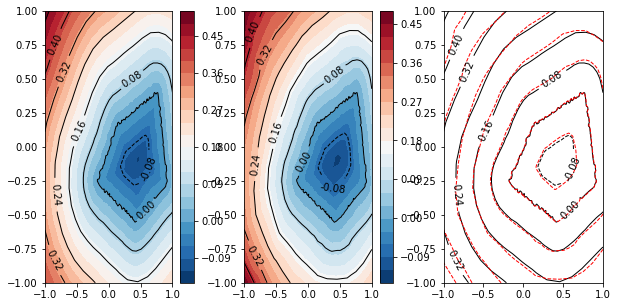

In [5]:
# visualization
data_loader, _ = get_sdf_data_loader(10, data_folder, 1, eval_frac=0, edge_method=edge_method, edge_params=edge_params)
output_func = lambda x: x[-1][1].numpy().reshape(-1)
plot_sdf_results(model, data_loader, save_name=save_name, output_func=output_func, levels=None)#[-0.1, 0., 0.1])